In [7]:
# LIBRARIES
import numpy as np
import pandas as pd

# from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
# from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import kneighbors_graph

In [5]:
# PARAMETERS
filepath = 'prepared_data/german.csv'

trial_cnt = 10

In [6]:
# GET DATA
df = pd.read_csv(filepath)

y_cols = ['y_true','y_pred_score','y_pred']
X_df =  df.loc[:, ~df.columns.isin(y_cols)]

X = X_df.to_numpy()
X_scaled = StandardScaler().fit_transform(X)

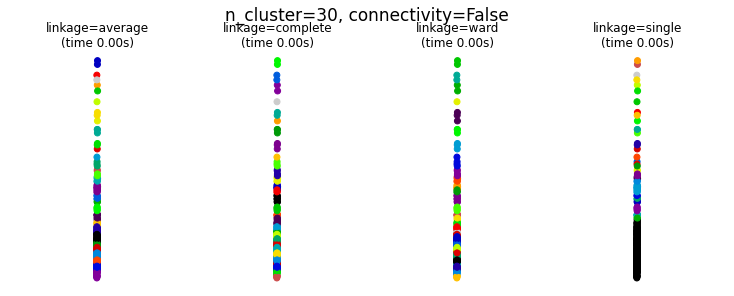

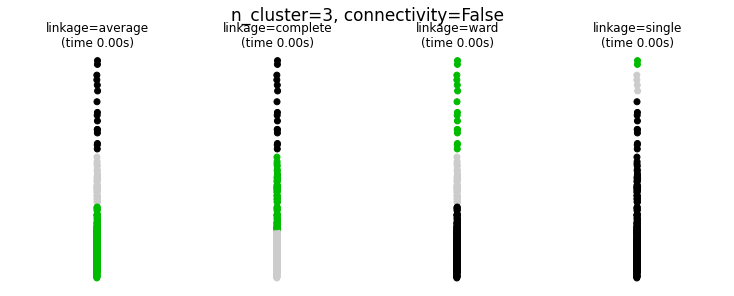

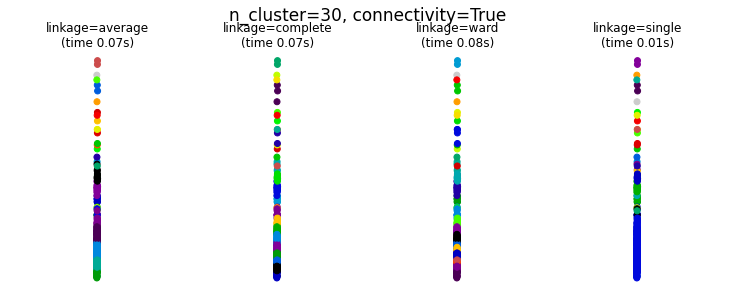

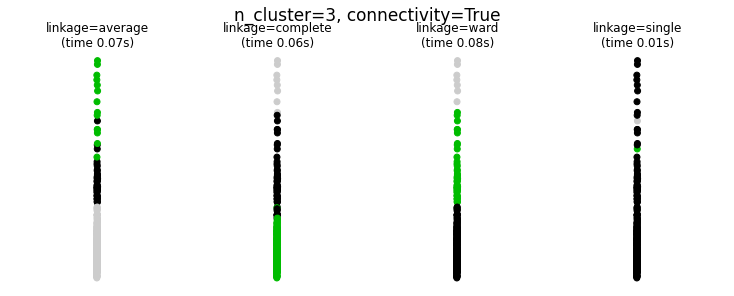

In [11]:
import time
import matplotlib.pyplot as plt

knn_graph = kneighbors_graph(X_scaled, 30, include_self=False)



for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            # t0 = time.time()
            model.fit(X)
            # elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )


plt.show()